# Problem Statement 

* This dataset contains about 10 years of daily weather observations from many locations across Australia.

* A binary classification Problem 

* Forecast Tomorrow will be rain or not 

# Data Dictionary 




* This dataset contains about 10 years of daily weather observations from many locations across Australia.

* A binary classification Problem 

* Forecast Tomorrow will be rain or not 
This dataset contains about 10 years of daily weather observations from many locations across Australia. Before any processing, we must first obtain information about the data we are going to use.

**Task to perform**

 predict the target variable Rain_Tomorrow
  the column which are the input are as follows:


*   DATE: the date if each day is provided to check the data is consistent, we can break date in day, month and year.
*   LOCATION: Albury, New castle, Richmode and other areas of Australia is covered
*   MIN TEMP: Min temperatura of each location is provided which helps to check the humidity of the environment
*   MAX TEMP: Max temperature is given to check the probablity of rain
*   RANFALL: Rainfall record is also given, there are som areas where 0.0 value is given so there were no rain happen about 10 years in that region.
*   EVAPORATION: Mostly the value of evaporation is NAN in different areas.
*   SUNSHNE: Sunshine value is mostly null in areas which the cloudy environment.
*   WIND GUST DIR: The direction od wind blowing is provided there.
*   WIND GUST SPEED: The speed of wind is also provided there.
*   WindDir9am : The direction of wind at specific time is there so the comparison b/w different times will help in analysis of Rain_Tomorrow.
*   WindDir3pm : Speed direction at 3pm
*   WindSpeed9am :  Within Australia, wind speeds are generally presented in kilometres per hour. Thats why different time stamp wind speed is given there.
*   WindSpeed3pm : As above, due to change of wind speed per hour, this will help to predict the target variable.
*   Humidity9am : The humidity ranges b/w 6 hours in Australia.
*   Humidity3pm : As above, 6 hours change is provided for analysis
*   Pressure9am : Pressure rate per 6 hours is given
*   Pressure3pm	: As it ranges or varies from 6 hours, the data will help to find accurate results.
*   Cloud9am : The weather changes about 6 hours 
*   Cloud3pm : 6 hours gap in cloudy env data will helpful in prediction.
*   Temp9am	: Temperature varien from north to south
*   Temp3pm	: Temperature also varies fom 6 hours time stamp
*   RainToday	: Rain Today is helpful to predict either its going to rai tomorrow.
*   RainTomorrow : Rain Tomorrow is our target variable to predict the rain in Australia by using above given features.

# Importing Libraries 

In [74]:
import numpy as np   # for numerical computation with n dimensional arrays 
import pandas as pd # for data manipluation 
import matplotlib.pyplot as plt # for data visualization 
import seaborn as sns # for conditional plotting 

# Loading Data 

In [75]:
data = pd.read_csv("/content/drive/MyDrive/Data Science Competition /weatherAUS(1).csv")  # pandas method to read csv 
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [76]:
data.info()  # for complete understanding about data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

### Information we get from the data 
* 145460 rows 
* 23 columns 
* 7 columns we have object 
* 16 columns we have folat 


# Data Preprocessing 

In [77]:
data.describe()  # checking descripion 

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [78]:
data.describe(include= "object")  # checking description including object 

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2013-09-14,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


In [79]:
data.isnull().sum()  #checking missing values 

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

# Separation of Categorical (discrete) or Numerical (Contnious) 

In [80]:
# Checking Categorical Features in dataset and counting it 

cat_features = [columns_name for columns_name in data.columns if data[columns_name].dtype == "O"]
print("Number of Categorical Features we have in data is : {}  ".format(len(cat_features)))
print("Here is Listed features {} ".format(cat_features))


Number of Categorical Features we have in data is : 7  
Here is Listed features ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow'] 


In [81]:
# Checking Numerical Features in dataset and counting it 

num_features = [columns_name for columns_name in data.columns if data[columns_name].dtype != "O"]
print("Number of Numerical Features we have in data is : {}  ".format(len(num_features)))
print("Here is the Listed Numerical features {} ".format(num_features))


Number of Numerical Features we have in data is : 16  
Here is the Listed Numerical features ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'] 


# Checking Cardanility 

* number of unique vaues in cardinality could be 
* if there are more unique values then it is hard to do label encoding 
* also effect on the efficiency of the model 

In [82]:
for i  in cat_features:
  count = len(data[i].unique())
  print("The Cardinality of each column {} : {} ".format(i,count))

# hence the unqiue value in  date column is very large, Thus
# Cardinality of Data is high which poses several problem to the model in terms of efficiency 
# because we need to do numerical encoding or create dummies 

The Cardinality of each column Date : 3436 
The Cardinality of each column Location : 49 
The Cardinality of each column WindGustDir : 17 
The Cardinality of each column WindDir9am : 17 
The Cardinality of each column WindDir3pm : 17 
The Cardinality of each column RainToday : 3 
The Cardinality of each column RainTomorrow : 3 


## Handling Cardinatlity issue 

In [83]:
data["Date"] = pd.to_datetime(data["Date"])   #Converting into Date
data["Year"] = data["Date"].dt.year           #abstracting year in different column 
data["Month"] = data["Date"].dt.month         #abstracting month in diffrent column  
data["Day"] = data["Date"].dt.day             #abstracting day in diffrent column  

In [84]:
data.head()  # we can see the columns in the end 

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [85]:
# Dropping Date Column 

data.drop("Date", axis = 1, inplace = True)
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


# Handling Missing values 

## for categorical Variables 

In [86]:
categorical_features = [column_name for column_name in data.columns if data[column_name].dtype =="O"]

In [87]:
categorical_features    # now we have the features othe than date 

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [88]:
missing_cat = data[categorical_features].isnull().sum() # Total missing values 
print(missing_cat)

Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64


<BarContainer object of 6 artists>

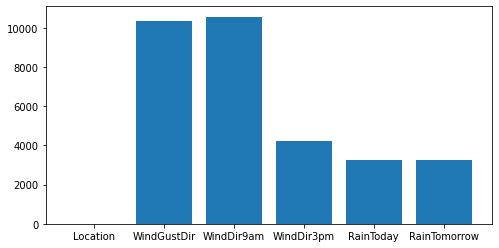

In [89]:
plt.figure(figsize= (8,4))
plt.bar(missing_cat.index,missing_cat.values ) # by visualization we can see that winDir3pm has large number of missing values 

## Handling Missing Values for Categorical 

In [90]:
cat_features_with_null = [features for features in categorical_features if data[features].isnull().sum()]  # list will return with categorical features
for each_feature in cat_features_with_null:
  data[each_feature] = data[each_feature].fillna(data[each_feature].mode()[0])     #each cat_feature is filled by most repeated value 



In [91]:
data[categorical_features].isnull().sum()  # here we can see ther is no missing values now 

Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

## for Continous Features 

In [92]:
num_col = [num_col for num_col in data.columns if data[num_col].dtype !="O"] 
#numerical features extraction from the data 

In [93]:
missing_num = data[num_col].isnull().sum()    # counting missing values in each  num_feature 
missing_num

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
Year                 0
Month                0
Day                  0
dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 <a list of 19 Text major ticklabel objects>)

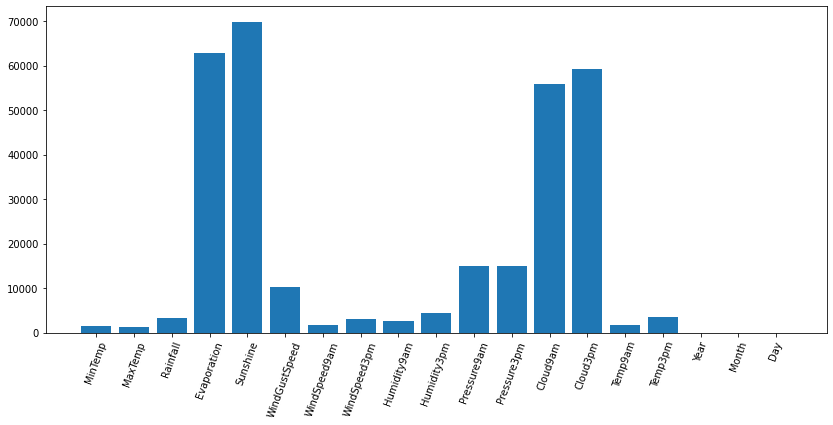

In [94]:
plt.figure(figsize=(14,6))
plt.bar(missing_num.index,missing_num.values)    # ploting missing values 
plt.xticks(rotation=70)

In [95]:
num_col_with_null_values = [col for col in num_col if data[col].isnull().sum()]
missing_values = data[num_col_with_null_values].isnull().sum()
missing_values

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
dtype: int64

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


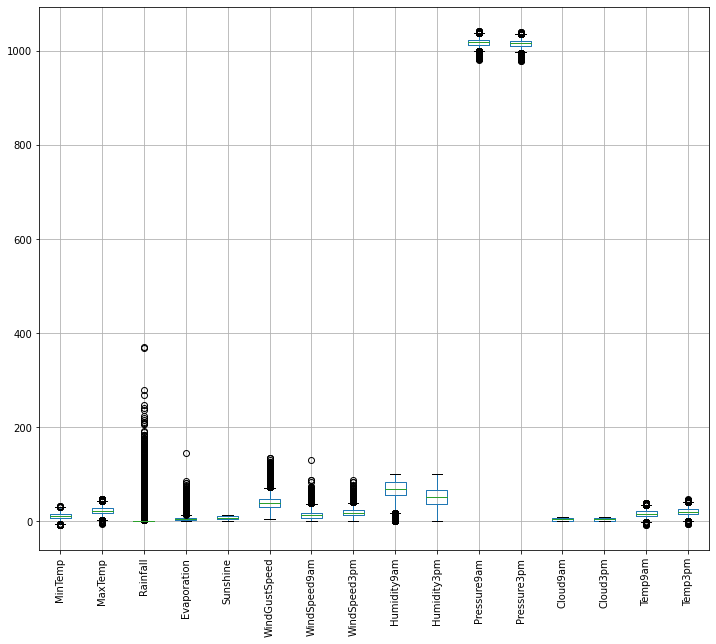

In [96]:
# we can not directly impute missing values by using mean becuase there could be a chance of outliers in the data 
# lets check by box plot 
plt.figure(figsize=(12,10))
data.boxplot(num_col_with_null_values,rot = 90)

In [97]:
# we can see that there are many outliers in specially Rainfall and other featrures 
# lets handle this 

In [98]:
# Remove Outliers from Numerical Features 

features_with_outliers = num_col_with_null_values
for feature in features_with_outliers:
  q1 = data[feature].quantile(0.25)
  q3 = data[feature].quantile(0.75)
  IQR = q3-q1
  lower_limit = q1 - (IQR*1.5)
  upper_limit = q3 + (IQR*1.5)
  data.loc[data[feature]<lower_limit, feature] = lower_limit
  data.loc[data[feature]>upper_limit, feature] = upper_limit

# after running this the outliers will be removed from our numerical features of the data 

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


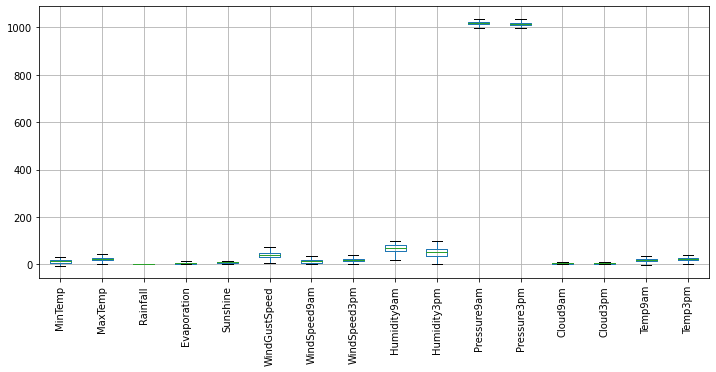

In [99]:
plt.figure(figsize=(12,5))
data.boxplot(num_col_with_null_values,rot = 90)    # we can see there is no outliers now 

In [100]:
for features in num_col_with_null_values:
  data[features] = data[features].fillna(data[features].mean())   # all missing values imputed by mean 

In [101]:
data[num_col_with_null_values].isnull().sum()  # we can see there is no null values now 

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

# EDA

In [102]:
# Exploring Numerical Variables

df_num = data.select_dtypes(include = ['float64'])
df_num.head()
df_num.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

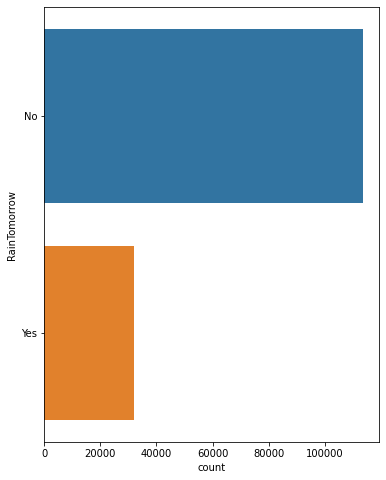

(145460, 6)

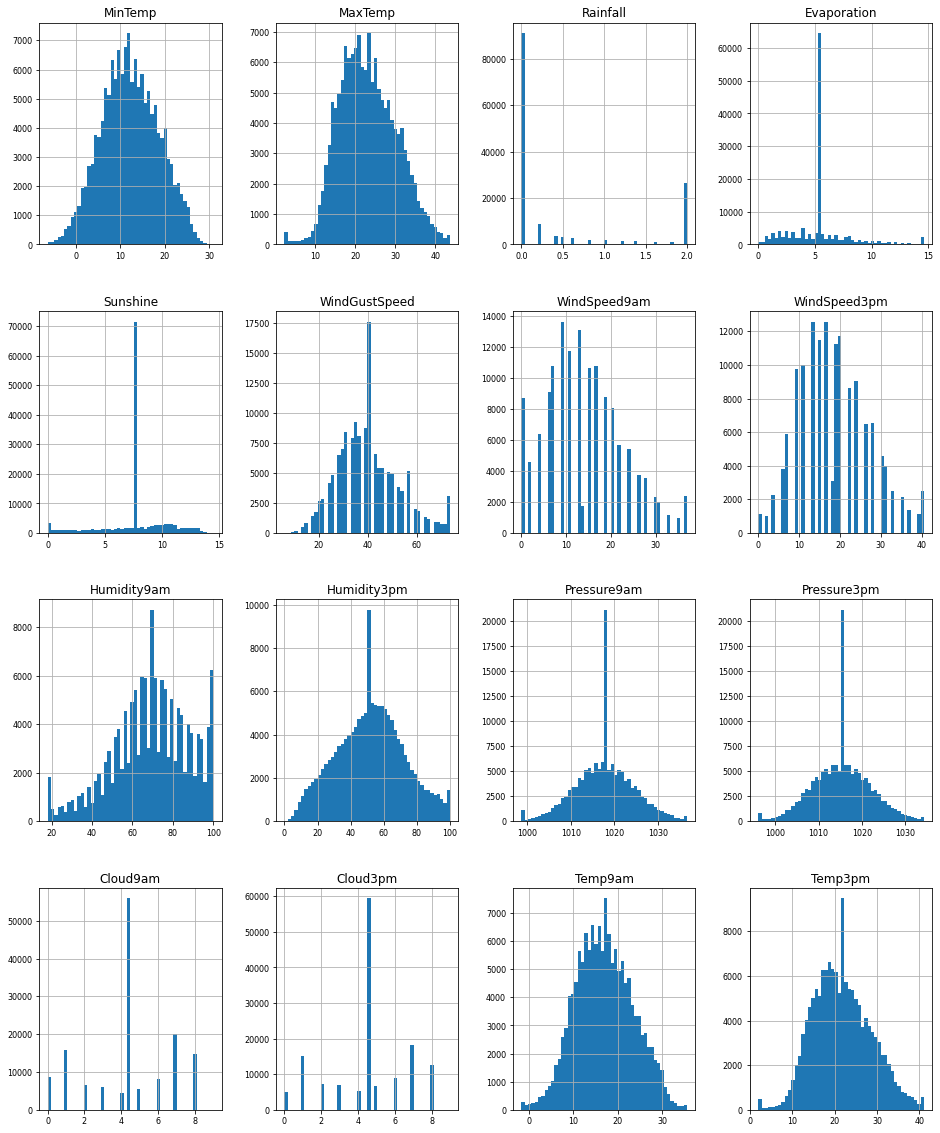

In [103]:
df_num.shape

data['RainTomorrow'].unique()

#View the Frequency Distribution
data['RainTomorrow'].value_counts()

f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(y="RainTomorrow", data=data)
plt.show()

# Histogram for Numerical Variables

df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

# Exploring Categorical Variables

df_cat = data.select_dtypes(include = ['O'])
df_cat.head()

df_cat.shape

## univariate analysis 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


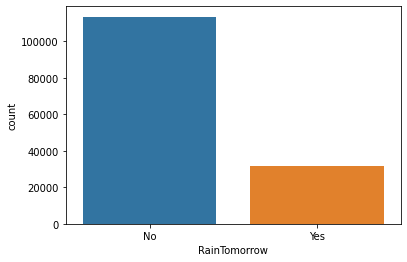

In [104]:
# Exploring Targeted Variable 

sns.countplot(data["RainTomorrow"])

# we can see there is more numbers of "no" values and it is imbalanced data 
# Although we can balance it but there is no need because it is actuall demographics 

## Bivariate Analysis 

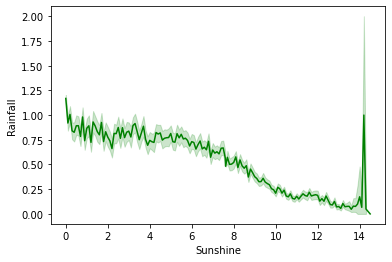

In [105]:
sns.lineplot(data= data,x="Sunshine",y="Rainfall",color = "green")

# we can see sunshine is inversely proportional to the Rainfall 

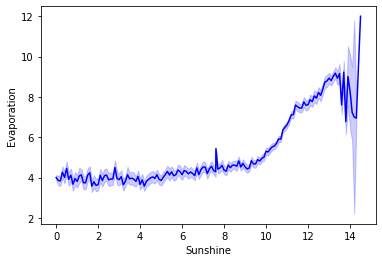

In [106]:
sns.lineplot(data= data,x="Sunshine",y="Evaporation",color = "blue")

# we can see sunshine is directly proportional to the Rainfall 

# Numerical Encoding 

In [107]:
data.isnull().sum() # as there is no null values now 
# and for Machine learning we know machine understand only numerical data so we need to convert 
# categorical features into Dummy variables or need to do encoding 

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Year             0
Month            0
Day              0
dtype: int64

In [108]:
cat_fea = [i for i in data.columns if data[i].dtype == "O"]
cat_fea   # Finding final categorical features that is need to be turned into Numericals Encoding means numerical values 

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [109]:
# here we are defining a function 
def encode_cat(feature):   # function will take feature 
  mapping_dic = {}         # empty dic 
  unique_val = list(data[feature].unique())    # extract particular feature from data and convert into list 
  for idx in range(len(unique_val)):      #loop will run till the len of list 
    mapping_dic[unique_val[idx]] = idx    # assign the index to the index of the list 
  return mapping_dic       # return the feature 


In [110]:
for i in cat_fea:   # we have the list of categorical features 
  data[i].replace(encode_cat(i), inplace = True)  
  print(data.head())

   Location  MinTemp  MaxTemp  Rainfall  ...  RainTomorrow  Year Month  Day
0         0     13.4     22.9       0.6  ...            No  2008    12    1
1         0      7.4     25.1       0.0  ...            No  2008    12    2
2         0     12.9     25.7       0.0  ...            No  2008    12    3
3         0      9.2     28.0       0.0  ...            No  2008    12    4
4         0     17.5     32.3       1.0  ...            No  2008    12    5

[5 rows x 25 columns]
   Location  MinTemp  MaxTemp  Rainfall  ...  RainTomorrow  Year  Month  Day
0         0     13.4     22.9       0.6  ...            No  2008     12    1
1         0      7.4     25.1       0.0  ...            No  2008     12    2
2         0     12.9     25.7       0.0  ...            No  2008     12    3
3         0      9.2     28.0       0.0  ...            No  2008     12    4
4         0     17.5     32.3       1.0  ...            No  2008     12    5

[5 rows x 25 columns]
   Location  MinTemp  MaxTemp  Rainf

# WE have done 
* we have converted all categorical data into numerical values 
* first we separtated it and then we converted into numerical 

In [111]:
data["RainTomorrow"].unique()

array([0, 1])

# Corrlation

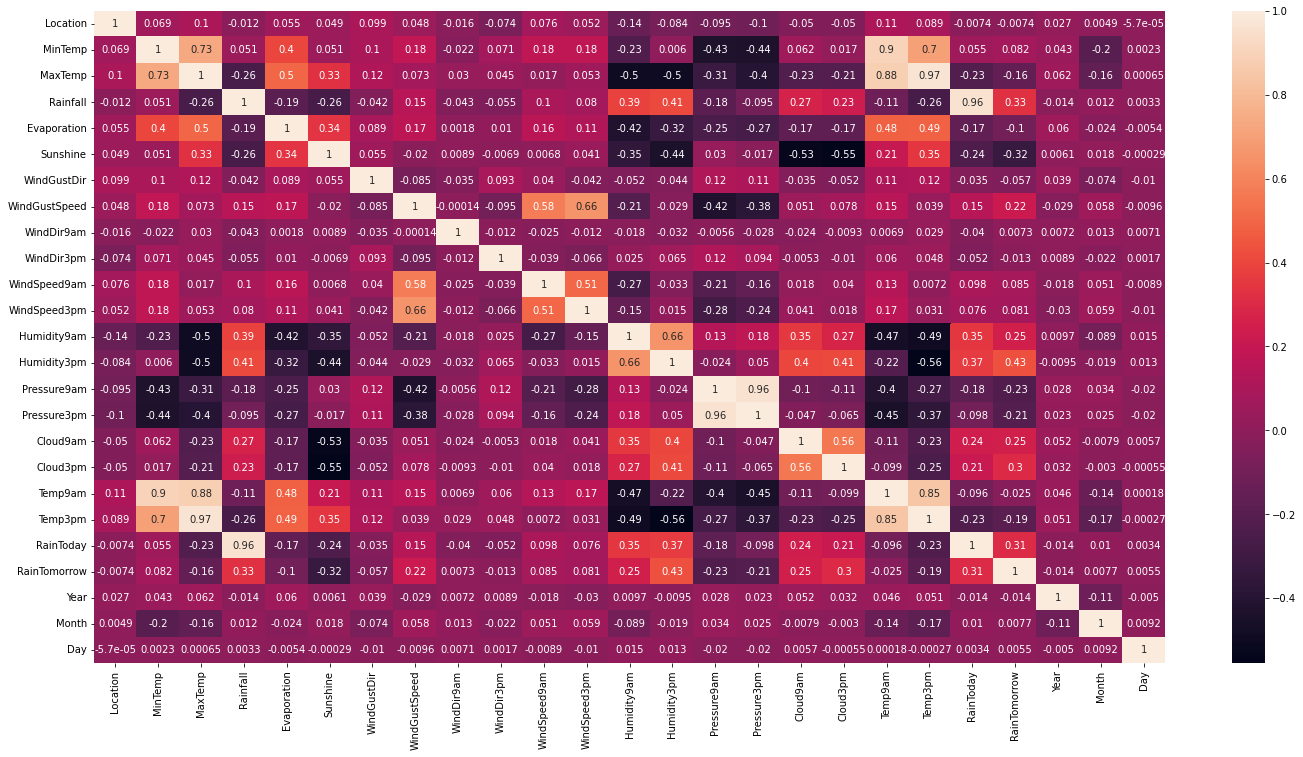

In [112]:
plt.figure(figsize =(24,12))
sns.heatmap(data.corr(), annot = True)

# spliiting data 

In [113]:
y = data["RainTomorrow"]  # dependent or target 
x = data.drop(["RainTomorrow"],axis = 1)  # indepedent or input 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


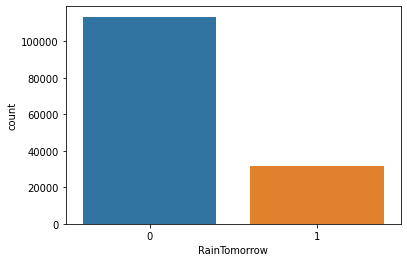

In [114]:
# Exploring Targeted Variable 

sns.countplot(data["RainTomorrow"])

# as we see  can see here the data is unbalanced so we are going to use over sampling method for better forcasting 

# over Sampling 

In [115]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x,y=smote.fit_resample(x,y)

print(x.shape,y.shape)

(227166, 24) (227166,)


# Feature Estimation 


* we can also use weight of evidence 
* but here we will use  ExtraTreesRegressor 

In [116]:
# we will use ExtraTreesRegressor for getting the weight of evidence 
from sklearn.ensemble import ExtraTreesRegressor
feat_sel_model = ExtraTreesRegressor()
feat_sel_model.fit(x,y)
features_imp = feat_sel_model.feature_importances_
features_imp

array([0.02786471, 0.02084808, 0.02039831, 0.17290299, 0.01821062,
       0.04364909, 0.02486228, 0.04988524, 0.02154238, 0.02343924,
       0.02291641, 0.02327731, 0.02797493, 0.19470068, 0.027381  ,
       0.04491819, 0.03472377, 0.07561813, 0.01971348, 0.0201132 ,
       0.01371739, 0.02269374, 0.02485419, 0.02379465])

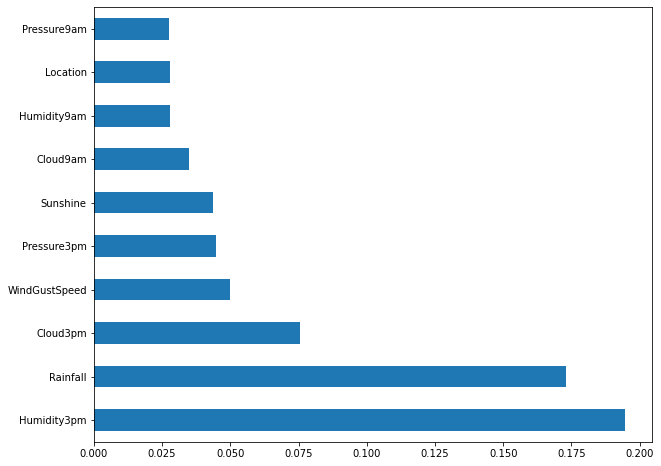

In [117]:
features_imp_val = pd.Series(features_imp, index = x.columns)
plt.figure(figsize=(10,8))
features_imp_val.nlargest(10).plot(kind = "barh")

# spliiting data into tarining and testing 

In [118]:
from sklearn.model_selection import train_test_split   # testing and splitting 
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0 )

In [119]:
print("Length of Training Data: {}".format(len(x_train)))
print("Length of Testing Data: {}".format(len(x_test)))

Length of Training Data: 181732
Length of Testing Data: 45434


# Feature Scaling 

In [120]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)


In [121]:
x_test = scaler.transform(x_test)

# Model Building 

## Model Fitting 

In [122]:
from sklearn.linear_model import LogisticRegression
classifier_logreg = LogisticRegression(solver='liblinear', random_state=0)
classifier_logreg.fit(x_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

## Model Testing 

In [123]:
y_pred = classifier_logreg.predict(x_test)
y_pred

array([0, 1, 1, ..., 0, 0, 1])

## Model Accuracy 

In [124]:
from sklearn.metrics import accuracy_score
print("Accuracy Score: {}".format(accuracy_score(y_test,y_pred)))

Accuracy Score: 0.7910155390236386


## Model Score 

* Checking underfitting and overfitting 

In [125]:
print("Train Data Score: {}".format(classifier_logreg.score(x_train, y_train)))
print("Test Data Score: {}".format(classifier_logreg.score(x_test, y_test)))

Train Data Score: 0.7912475513393349
Test Data Score: 0.7910155390236386


## Confusion Martix 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


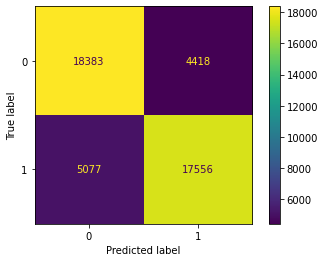

In [126]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier_logreg, x_test,y_test)


## ROC Curve 

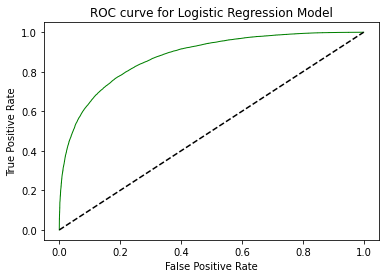

In [127]:
y_pred_logreg_proba = classifier_logreg.predict_proba(x_test)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg_proba[:,1])
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,'-g',linewidth=1)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for Logistic Regression Model')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show()

## Cross Validation 

In [128]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier_logreg, x_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {}'.format(scores.mean()))

Cross-validation scores:[0.79178474 0.7936556  0.78668904 0.7909261  0.79224674]
Average cross-validation score: 0.7910604443936666


# Using Different Algos 

In [131]:
def evaluate(model):
    model.fit(x_train,y_train)
    accuracy=model.score(x_test,y_test)
    
    print('model name ',model)
    print('accuracy ',accuracy)

In [132]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

lr=LogisticRegression()
svm=SVC()
dt=DecisionTreeClassifier(max_depth=6)
rf=RandomForestClassifier(max_samples=0.9)
knn=KNeighborsClassifier(n_neighbors=5)

models=[lr,dt,rf,knn]

for model in models:
    evaluate(model)

model name  LogisticRegression()
accuracy  0.7910155390236386
model name  DecisionTreeClassifier(max_depth=6)
accuracy  0.7941629616586697
model name  RandomForestClassifier(max_samples=0.9)
accuracy  0.9042567240392657
model name  KNeighborsClassifier()
accuracy  0.8576836730202051


# Using XGboost 

In [133]:
import xgboost as xgb

xgb = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
              colsample_bynode=0.9, colsample_bytree=0.5, gamma=0,
              grow_policy='lossguide', learning_rate=0.4, max_bin=512,
              max_delta_step=0, max_depth=8, min_child_weight=0.8, missing=None,
              n_estimators=100, n_jobs=1, nthread=None, num_parallel_tree=9,
              objective='binary:hinge', random_state=0, reg_alpha=2,
              reg_lambda=3, sampling_method='uniform', scale_pos_weight=1,
              seed=None, silent=None, subsample=0.8, tree_method='hist',
              verbosity=1)

xgb.fit(x_train, y_train)

XGBClassifier(colsample_bylevel=0.9, colsample_bynode=0.9, colsample_bytree=0.5,
              grow_policy='lossguide', learning_rate=0.4, max_bin=512,
              max_depth=8, min_child_weight=0.8, num_parallel_tree=9,
              objective='binary:hinge', reg_alpha=2, reg_lambda=3,
              sampling_method='uniform', subsample=0.8, tree_method='hist')

In [134]:
from sklearn import metrics
pred = xgb.predict(x_test)
print('acc',metrics.accuracy_score(y_test,pred))
print('f1',metrics.f1_score(y_test,pred))
print('matrix',metrics.confusion_matrix(y_test,pred))

acc 0.910617599154818
f1 0.9066200648439835
matrix [[21659  1142]
 [ 2919 19714]]


# Finalizing Algorithm 

* we will use Random Forest Classifier as it gives 90% Accuracy for our forecasting of tomorrow rain 

## Random Forest Classifier 

## Model initilization 

In [135]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_samples=0.9)
classifier.fit(x_train,y_train)

RandomForestClassifier(max_samples=0.9)

## Model Fitting 

In [136]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 1, 1, ..., 0, 0, 1])

## Model Testing 

In [137]:
from sklearn.metrics import accuracy_score
print("Accuracy Score: {}".format(accuracy_score(y_test,y_pred)))

Accuracy Score: 0.9045868732667166


## Model Accuarcy 

In [138]:
print("Train Data Score: {}".format(classifier.score(x_train, y_train)))
print("Test Data Score: {}".format(classifier.score(x_test, y_test)))

Train Data Score: 0.9999889947835274
Test Data Score: 0.9045868732667166


## Model Score 

In [139]:
print("Train Data Score: {}".format(classifier.score(x_train, y_train)))
print("Test Data Score: {}".format(classifier.score(x_test, y_test)))

Train Data Score: 0.9999889947835274
Test Data Score: 0.9045868732667166


## Confusion Matrix 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


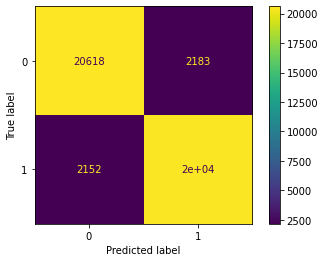

In [140]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, x_test,y_test)


## ROC Curve 

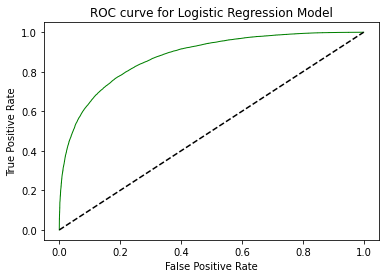

In [141]:
y_pred_logreg_proba = classifier_logreg.predict_proba(x_test)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg_proba[:,1])
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,'-g',linewidth=1)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for Logistic Regression Model')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show()

# Using Model for deployment or in production phase 

* We can use it now for production phase 
* it could be deployed on heruko or streamlit 
* we can develope web app on it 
* now we are dumbing our solution 

In [145]:
import pickle
pickle.dump(rf, open('iri.pkl', 'wb'))
loaded_model = pickle.load(open("iri.pkl", 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.9042567240392657
